![Example Image](https://raw.githubusercontent.com/jeevajosec/Capstone_Project/main/bike_rental.png)
<span style="font-size: 9px;">Image credits: Canva</span>.




## Project Title:
#### Predictive Analysis of  Bike Rental Demand Using Machine Learning Regression Models
## Author: 
#### Jeeva Jose C
## Organisation: 
#### Entri Elevate
## Completed on:
#### 01/01/2025



## Overview of Problem Statement:

Rental bikes have become a vital component of urban mobility, offering a convenient and eco-friendly transportation option for residents and visitors. As cities continue to adopt and expand bike-sharing programs, ensuring the availability of bikes at the right time and place is critical for minimizing waiting times and enhancing user satisfaction.  

A major challenge in this system lies in accurately predicting the hourly demand for rental bikes. Effective demand forecasting ensures a stable supply across the city, improving the overall rental experience and operational efficiency.  

This notebook explores the application of regression analysis to predict the number of bikes needed each hour based on various influencing factors such as weather conditions, time of day, and other contextual variables. By leveraging this analysis, we aim to provide actionable insights that can aid in better resource allocation and service optimization.  


## Objectives:  
1. **Data Understanding and Preprocessing**: Explore and prepare the dataset for analysis.  
2. **Exploratory Data Analysis (EDA)**: Visualize trends and relationships in the data.  
3. **Feature Selection**: Identify the most important features influencing bike rentals.  
4. **Multiple Model Training**: Train various regression models to predict bike rental demand.  
5. **Performance Comparison**: Compare the performance of different models using appropriate evaluation metrics.  
6. **Best Model Selection**: Select the best-performing model based on evaluation results.  
7. **Prediction and Validation**: Validate the chosen model on unseen data to assess its real-world applicability.  


## Dataset
The dataset for this analysis is publicly available on the UCI Machine Learning Repository at the following link: [https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand].
### Dataset Features

- **Date**: Day-Month-Year.
- **Rented Bike Count**: Count of bikes rented at each hour (target variable).
- **Hour**: Hour of the day (0–23).
- **Temperature**: Temperature in Celsius.
- **Humidity**: Humidity percentage (%).
- **Windspeed**: Wind speed in meters per second (m/s).
- **Visibility**: Visibility in units of 10 meters.
- **Dew Point Temperature**: Dew point temperature in Celsius.
- **Solar Radiation**: Solar radiation in megajoules per square meter (MJ/m²).
- **Rainfall**: Rainfall in millimeters (mm).
- **Snowfall**: Snowfall in centimeters (cm).
- **Seasons**: Categorical variable representing the season (Winter, Spring, Summer, Autumn).
- **Holiday**: Indicates whether the day is a hoiday (Holiday/ No holiday)
- **Functioning Day**: Represents whether the hour is functional (Yes/No)



## Data Understanding and Preprocessing  

In this section, we will:  
1. Load the dataset and inspect its structure.  
2. Handle missing values and outliers.  
3. Perform necessary transformations to prepare the data for analysis.

In [1]:
import warnings

# Suppress FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, uniform

# Preprocessing and feature selection
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression

# Machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Model tuning and pipelines
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

# Serialization
from joblib import dump, load
import joblib



In [2]:
# Detect the encoding
import chardet
with open('BikeRental.csv', 'rb') as f:
    result = chardet.detect(f.read())
print(result['encoding'])


ISO-8859-1


In [3]:
# Use the detected encoding to load Dataset
df = pd.read_csv('BikeRental.csv', encoding='ISO-8859-1')

In [4]:
# Display the first five rows of the dataset
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01-12-2017                254     0             -5.2           37   
1  01-12-2017                204     1             -5.5           38   
2  01-12-2017                173     2             -6.0           39   
3  01-12-2017                107     3             -6.2           40   
4  01-12-2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [5]:
# Display the shape of the dataset (rows, columns)
df.shape


(8760, 14)

In [6]:
# Display information about the dataset, including the number of non-null entries and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
# Renaming to simplify column names
df.columns = [
    'Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity',
    'Wind Speed', 'Visibility', 'Dew Point Temperature', 'Solar Radiation',
    'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning Day'
]


In [8]:
#Checking for null values
df.isnull().sum()

Date                     0
Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind Speed               0
Visibility               0
Dew Point Temperature    0
Solar Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
dtype: int64

There are no missing values

In [9]:
# Checking for Duplicates
df.duplicated().sum()

0

There are no duplicate entries

In [10]:
# Getting data types of each columns
df.dtypes

Date                      object
Rented Bike Count          int64
Hour                       int64
Temperature              float64
Humidity                   int64
Wind Speed               float64
Visibility                 int64
Dew Point Temperature    float64
Solar Radiation          float64
Rainfall                 float64
Snowfall                 float64
Seasons                   object
Holiday                   object
Functioning Day           object
dtype: object

In [11]:
# Obtain ststistical summary of numerical columns
df.describe()

Rented Bike Count         Hour  Temperature     Humidity   Wind Speed  \
count        8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean          704.602055    11.500000    12.882922    58.226256     1.724909   
std           644.997468     6.922582    11.944825    20.362413     1.036300   
min             0.000000     0.000000   -17.800000     0.000000     0.000000   
25%           191.000000     5.750000     3.500000    42.000000     0.900000   
50%           504.500000    11.500000    13.700000    57.000000     1.500000   
75%          1065.250000    17.250000    22.500000    74.000000     2.300000   
max          3556.000000    23.000000    39.400000    98.000000     7.400000   

        Visibility  Dew Point Temperature  Solar Radiation     Rainfall  \
count  8760.000000            8760.000000      8760.000000  8760.000000   
mean   1436.825799               4.073813         0.569111     0.148687   
std     608.298712              13.060369         0.868746     1.128193   
min      27.000000             -30.600000         0.000000     0.000000   
25%     940.000000              -4.700000         0.000000     0.000000   
50%    1698.000000               5.100000         0.010000     0.000000   
75%    2000.000000              14.800000         0.930000     0.000000   
max    2000.000000              27.200000         3.520000    35.000000   

          Snowfall  
count  8760.000000  
mean      0.075068  
std       0.436746  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       8.800000

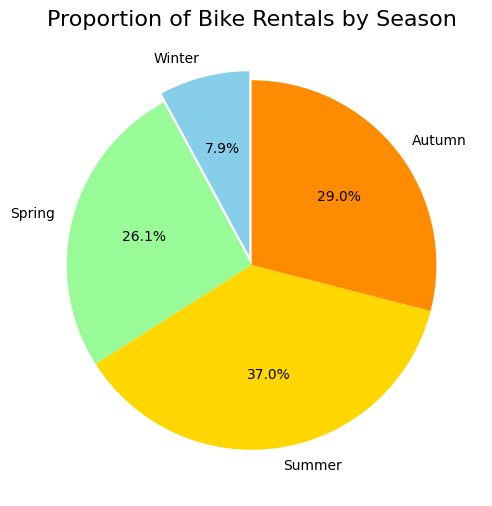

In [12]:
# Proportion of Bike Rentals by Season

seasonal_rentals = df.groupby('Seasons')['Rented Bike Count'].sum()

# Define season order
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
seasonal_rentals = seasonal_rentals.reindex(season_order)

# Plotting the pie chart
plt.figure(figsize=(6, 6))
colors = ['#87CEEB', '#98FB98', '#FFD700', '#FF8C00']  # Colors for each season
plt.pie(
    seasonal_rentals,
    labels=seasonal_rentals.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=[0.05, 0, 0, 0]  # Slightly explode the first slice (optional)
)

# Add title
plt.title('Proportion of Bike Rentals by Season', fontsize=16)

# Show plot
plt.show()

Pie chart indicates the relevance of 4 seasons in the data set.

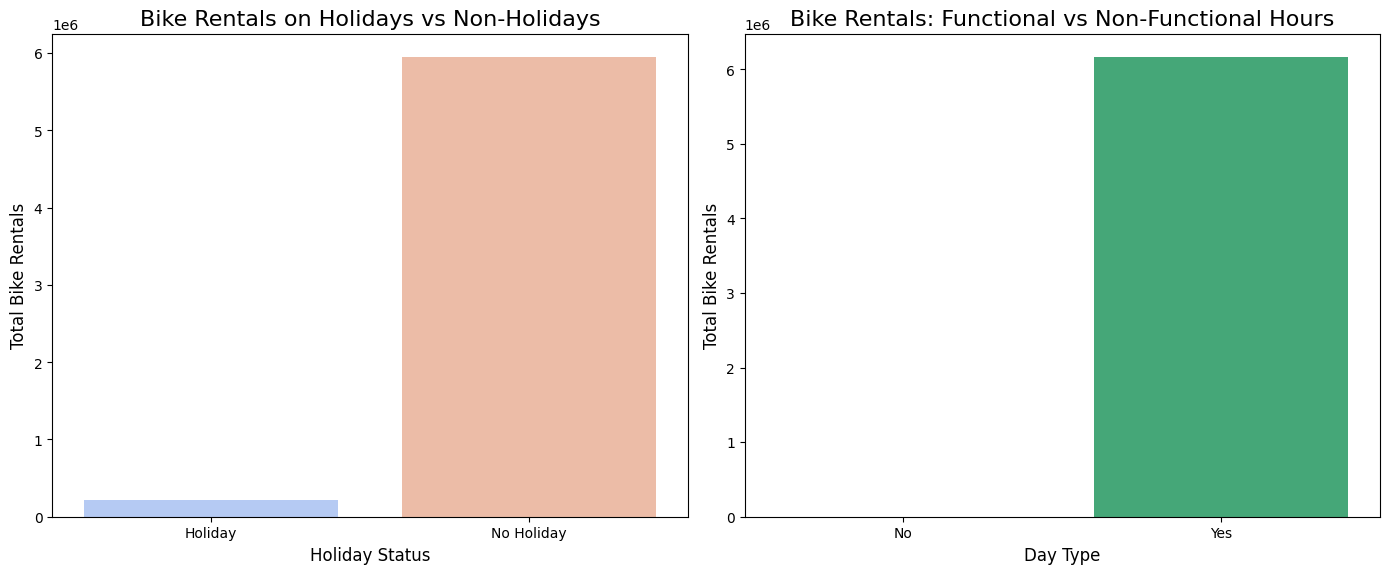

In [13]:
# Understand the distribution of Holiday and Functioning which are the categorical values

# Group data by Holiday and Functioning Day to calculate total rentals
holiday_rentals = df.groupby('Holiday')['Rented Bike Count'].sum().reset_index()
functional_rentals = df.groupby('Functioning Day')['Rented Bike Count'].sum().reset_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Holiday vs Non-Holiday
sns.barplot(x='Holiday', y='Rented Bike Count', hue='Holiday', data=holiday_rentals, ax=axes[0], palette='coolwarm')
axes[0].set_title('Bike Rentals on Holidays vs Non-Holidays', fontsize=16)
axes[0].set_ylabel('Total Bike Rentals', fontsize=12)
axes[0].set_xlabel('Holiday Status', fontsize=12)

# Plot Functional vs Non-Functional Hours
sns.barplot(x='Functioning Day', y='Rented Bike Count', hue='Functioning Day', data=functional_rentals, ax=axes[1], palette='viridis')
axes[1].set_title('Bike Rentals: Functional vs Non-Functional Hours', fontsize=16)
axes[1].set_ylabel('Total Bike Rentals', fontsize=12)
axes[1].set_xlabel('Day Type', fontsize=12)

# Show the plots
plt.tight_layout()
plt.show()

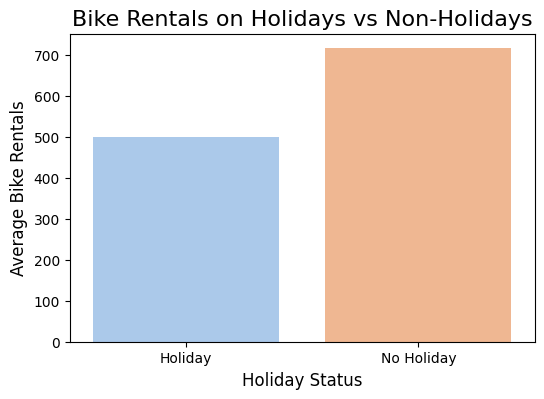

In [14]:
# Group data by Holiday and calculate mean rentals
holiday_rentals = df.groupby('Holiday')['Rented Bike Count'].mean().reset_index()

# Bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x='Holiday', y='Rented Bike Count', data=holiday_rentals, hue='Holiday', palette='pastel')
plt.title('Bike Rentals on Holidays vs Non-Holidays', fontsize=16)
plt.ylabel('Average Bike Rentals', fontsize=12)
plt.xlabel('Holiday Status', fontsize=12)
plt.show()

The above two visualisations shows that Functioning day column is irrelevant as non functioning day indicates 0 bikes rented. Holiday columns has high total rented for 'No Holiday'. But Mean Comparison reveals importance of both category.

In [15]:
# Drop the 'Functioning Day' column from the DataFrame 
df1 = df.drop(columns=['Functioning Day'])

In [16]:
#Ensure the 'Date' column is in datetime format
df1['Date'] = pd.to_datetime(df1['Date'], format='%d-%m-%Y')

#Extract the month
df1['Month'] = df1['Date'].dt.month

Month is extracted from the date column before dropping the date column

In [17]:
# Drop the 'Date' column from the DataFrame
df1 = df1.drop(columns=['Date'])

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented Bike Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind Speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew Point Temperature  8760 non-null   float64
 7   Solar Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Month                  8760 non-null   int32  
dtypes: float64(6), int32(1), int64(4), object(2)
memory usage: 855.6+ KB


## Exploratory Data Analysis (EDA)

In this part of the analysis, we will explore and prepare the dataset for modeling by performing the following tasks:

1. **Distribution of Numerical Columns**:  
   We will plot the distribution of the numerical features to understand their spread and identify any skewness or anomalies in the data.
2. **Checking and Handling Outliers**:  
   Outliers can distort the performance of many machine learning models. We will visualize and handle outliers by using boxplots and other statistical methods.
3. **Handling Skewness**:  
   Features with high skewness can impact model accuracy. We will check for skewness in the dataset and apply appropriate transformations (e.g., logarithmic or power transformations) to reduce it.
4. **Correlation Analysis**:  
   We will analyze the correlation between numerical features using a heatmap and Pearson correlation to identify the most influential features and relationships in the data.

Through this process, we aim to clean the data, reduce noise, and make it ready for model training.


In [19]:
# collect numeric columns to a new data frame 'numeric_columns'
numeric_columns=df1.select_dtypes(include=['number'])
print(numeric_columns.columns)

Index(['Rented Bike Count', 'Hour', 'Temperature', 'Humidity', 'Wind Speed',
       'Visibility', 'Dew Point Temperature', 'Solar Radiation', 'Rainfall',
       'Snowfall', 'Month'],
      dtype='object')


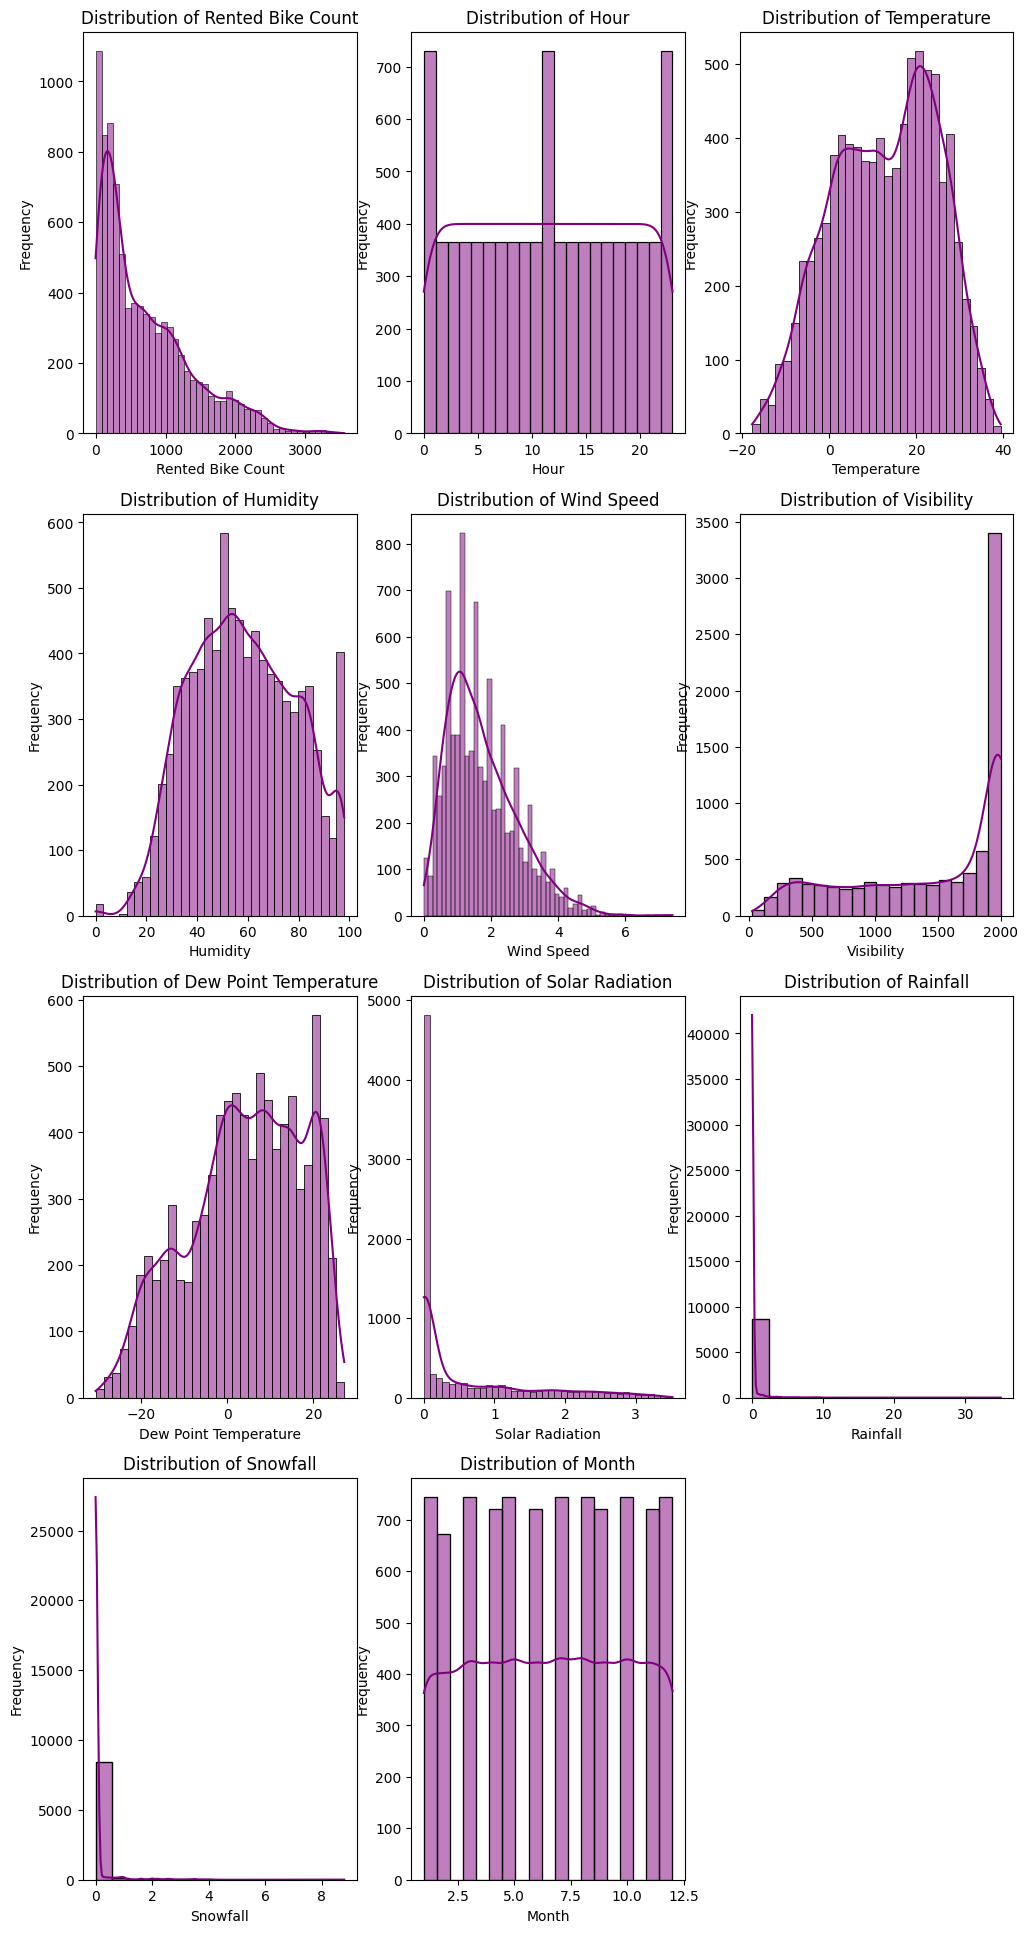

In [20]:
# Distribution plot of numeric colums

plt.figure(figsize=(12, 24))
for i, col in enumerate (numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(x=df1[col], kde= True, color='purple')
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'{col}')  # Set the label for the x-axis
    plt.ylabel('Frequency') 
plt.show()

Distributions of Month and Hour indicate that they are behaving as Categorical values. And all columns show skewness.

In [21]:
# Define new set of numeric columns Eliminating  Hour and Month
numeric_new=numeric_columns.drop(columns=['Hour','Month'])
# defining categorical independent variables separately
cat_columns = ['Hour','Seasons', 'Holiday', 'Month']

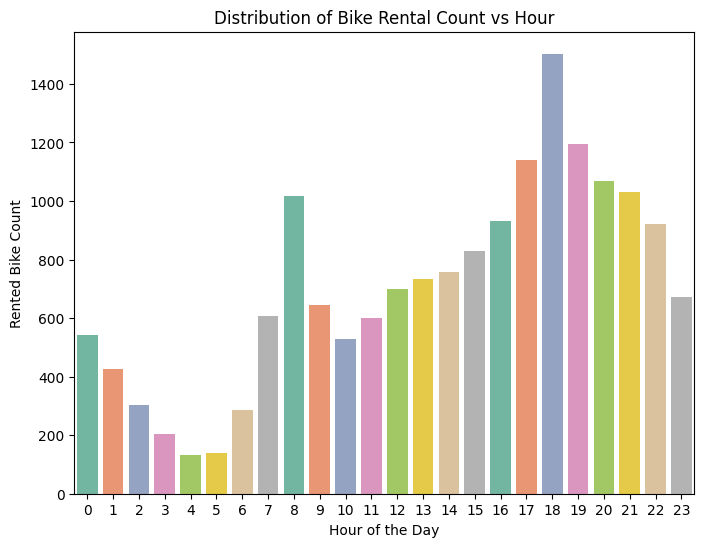

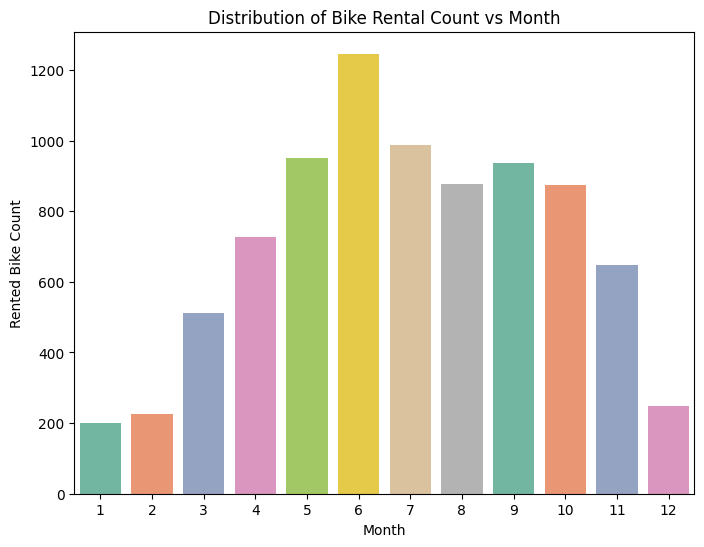

In [22]:
# Distribution of Bike Rental Count vs Hour
plt.figure(figsize=(8, 6))
sns.barplot(data=df1, x='Hour', y='Rented Bike Count', hue='Hour', legend=False, palette='Set2', errorbar=None)
plt.title('Distribution of Bike Rental Count vs Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Rented Bike Count')
plt.show()

# Distribution of Month vs Hour
plt.figure(figsize=(8, 6))
sns.barplot(data=df1, x='Month', y='Rented Bike Count',  hue='Month', legend=False, palette='Set2', errorbar=None)
plt.title('Distribution of Bike Rental Count vs Month')
plt.xlabel('Month')
plt.ylabel('Rented Bike Count')
plt.show()

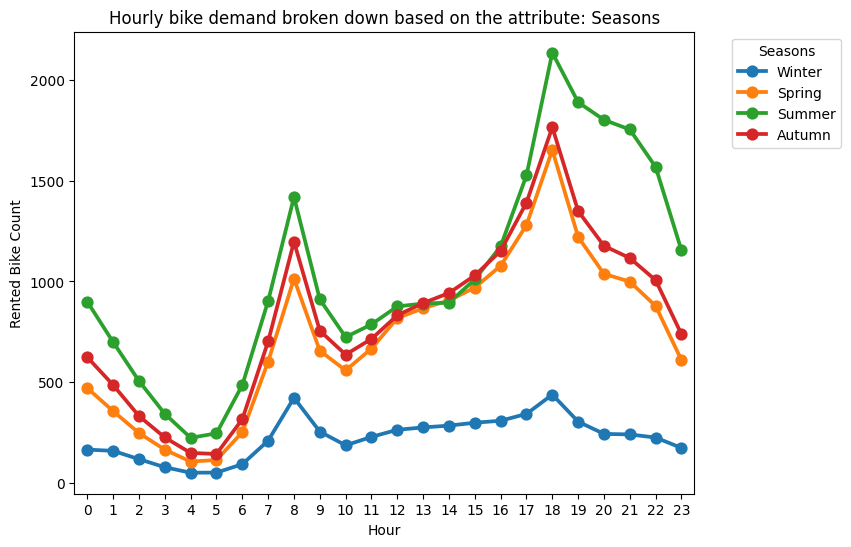

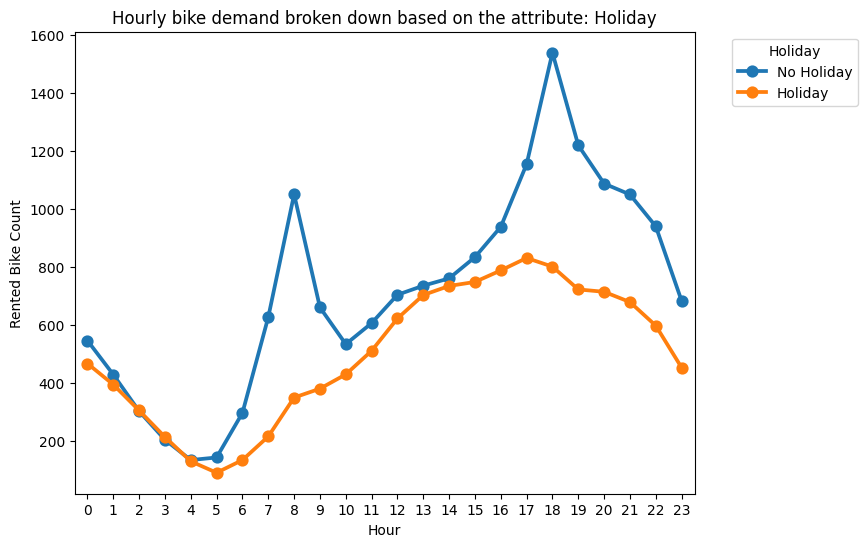

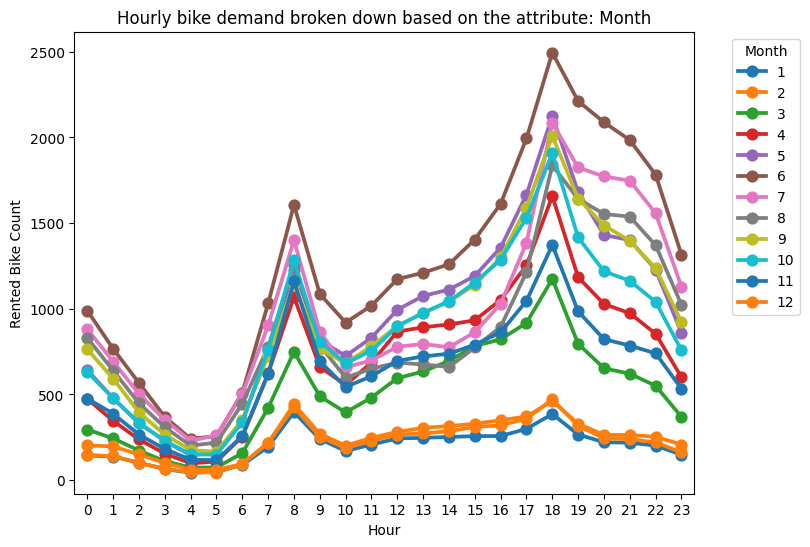

In [23]:
# Chart - 6 visualization code
for i in cat_columns:
  if i == 'Hour':
    continue
  else:
    fig, ax = plt.subplots(figsize=(8,6))
    sns.pointplot(data=df1, x='Hour', y='Rented Bike Count', hue=i,  palette='tab10', errorbar=None, ax=ax, )
    plt.ylabel("Rented Bike Count")
    plt.xlabel("Hour")
    plt.title('Hourly bike demand broken down based on the attribute: '+i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
    plt.show()

From the plot we understand that
1. Demand is less in winter  among the season at all hours
2. Demand is more on Functional Days compared to holidays at almost all hours 
3. 8th and 18th hour shows high demand when compared to other hours

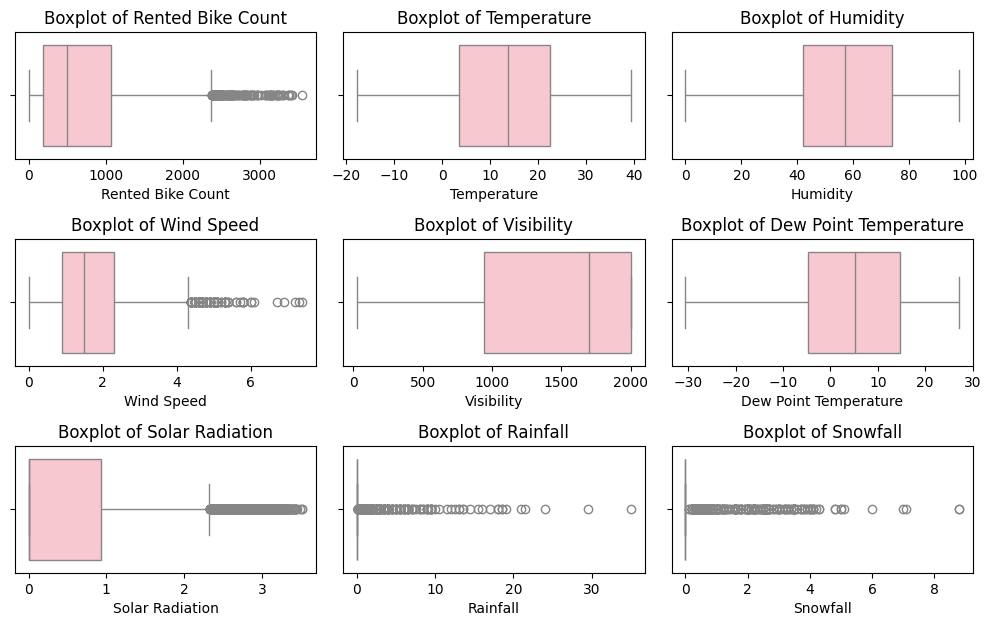

In [24]:
# plot boxplot of numerical columns to understand outliers
plt.figure(figsize=(10,8))
for i, col in enumerate (numeric_new, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df1[col], color='pink')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

For Rain Fall and Snow fall, 75 percentage of value is 0 which is the minimum value itself which indicates the need of seperate handling of these two columns from other columns.



In [25]:
# Handling Outliers 
numeric_1 = numeric_new.drop(columns=['Rainfall', 'Snowfall']) # Exclude Rainfall(mm) and Snowfall(cm)
numeric_cols = numeric_1.columns  
special_cols = ['Rainfall', 'Snowfall']


def handle_outliers_combined(data, numeric_cols, special_cols):
    # Handle outliers for numeric_cols using capping
    for col in numeric_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds
        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)
        
        # Cap the outliers
        data[col] = data[col].apply(lambda x: lower if x < lower else upper if x > upper else x)
    
    # Handle outliers for special_cols using capping
    for col in special_cols:
        Q1 = data[col].quantile(0.01)
        Q3 = data[col].quantile(0.99)
        IQR = Q3 - Q1
        
        # Define lower and upper bounds
        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)
        
        
        # Replace outliers with the mean
        data[col] = data[col].apply(lambda x: lower if x < lower else upper if x > upper else x)
    
    return data


df1 = handle_outliers_combined(df1, numeric_cols, special_cols)


In [26]:
# Check skewness of numerical columns
print(df1[numeric_new.columns].skew())

Rented Bike Count        1.003266
Temperature             -0.198326
Humidity                 0.059579
Wind Speed               0.714700
Visibility              -0.701786
Dew Point Temperature   -0.367298
Solar Radiation          1.267346
Rainfall                 8.962051
Snowfall                 7.641428
dtype: float64


Temperature and Humidity has negligible skewness

In [27]:
# making new dataframe dropping temperature and humidity to address the skewness
numeric_2=numeric_new.drop(columns=['Temperature', 'Humidity'])

In [28]:
numeric=numeric_2.columns
# Initialize and fit transformer
yeo_transformer = PowerTransformer(method='yeo-johnson', standardize=True)
df1[numeric] = yeo_transformer.fit_transform(df1[numeric])

In [29]:
print("Skewness after transformation is:\n")
print(df1[numeric_new.columns].skew())

Skewness after transformation is:

Rented Bike Count       -0.140727
Temperature             -0.198326
Humidity                 0.059579
Wind Speed              -0.002993
Visibility              -0.520803
Dew Point Temperature   -0.124635
Solar Radiation          0.550148
Rainfall                 3.712452
Snowfall                 4.103145
dtype: float64


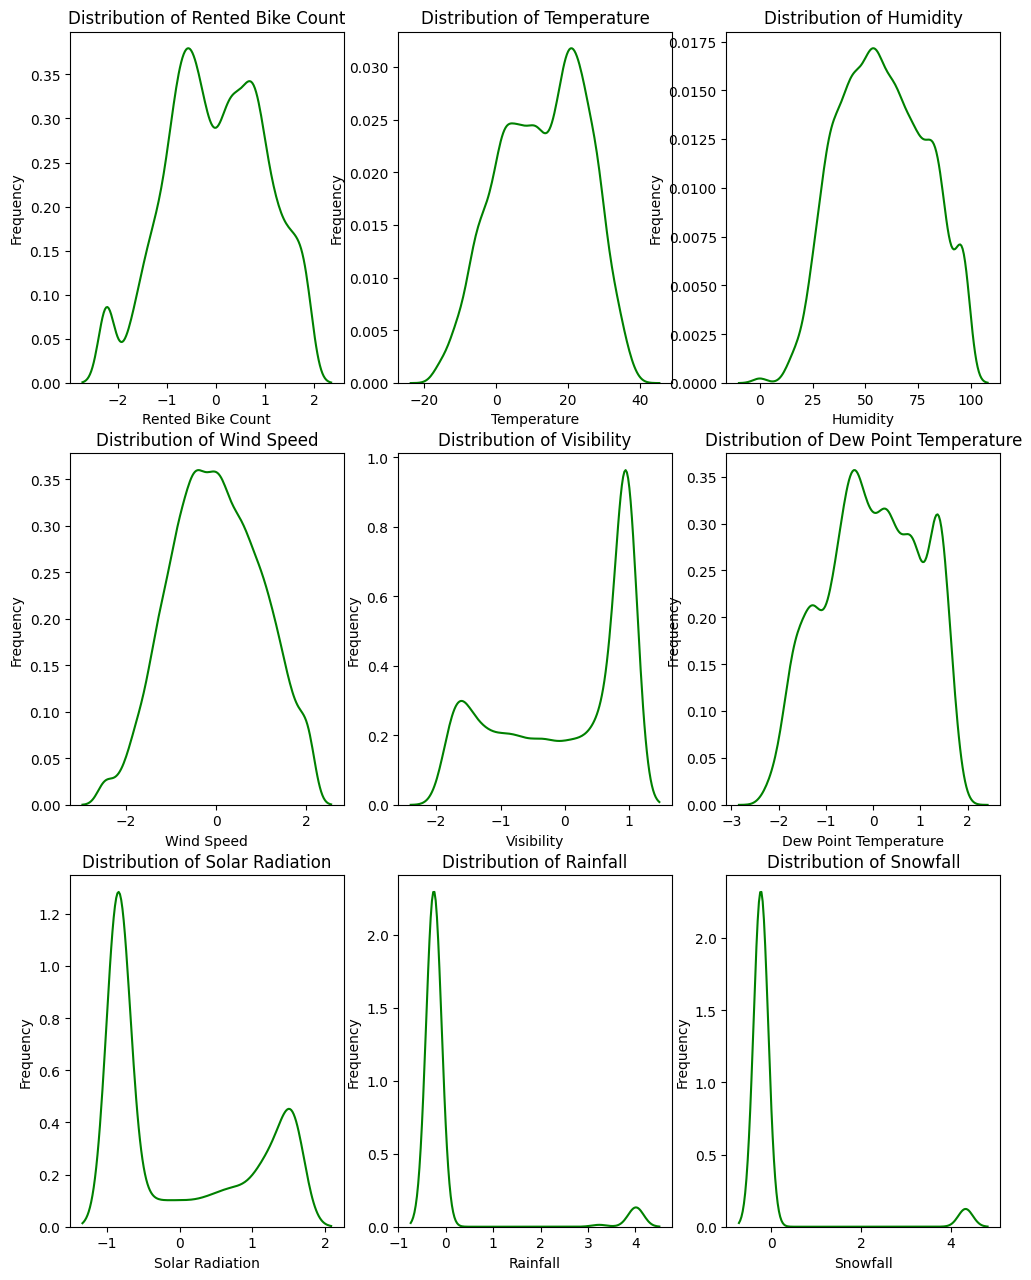

In [30]:
# Distribution plot after outlier handling and transformation
plt.figure(figsize=(12, 21))
for i, col in enumerate (numeric_new, 1):
    plt.subplot(4, 3, i)
    sns.kdeplot(df1[col], color='green')
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'{col}')  # Set the label for the x-axis
    plt.ylabel('Frequency') 
plt.show()

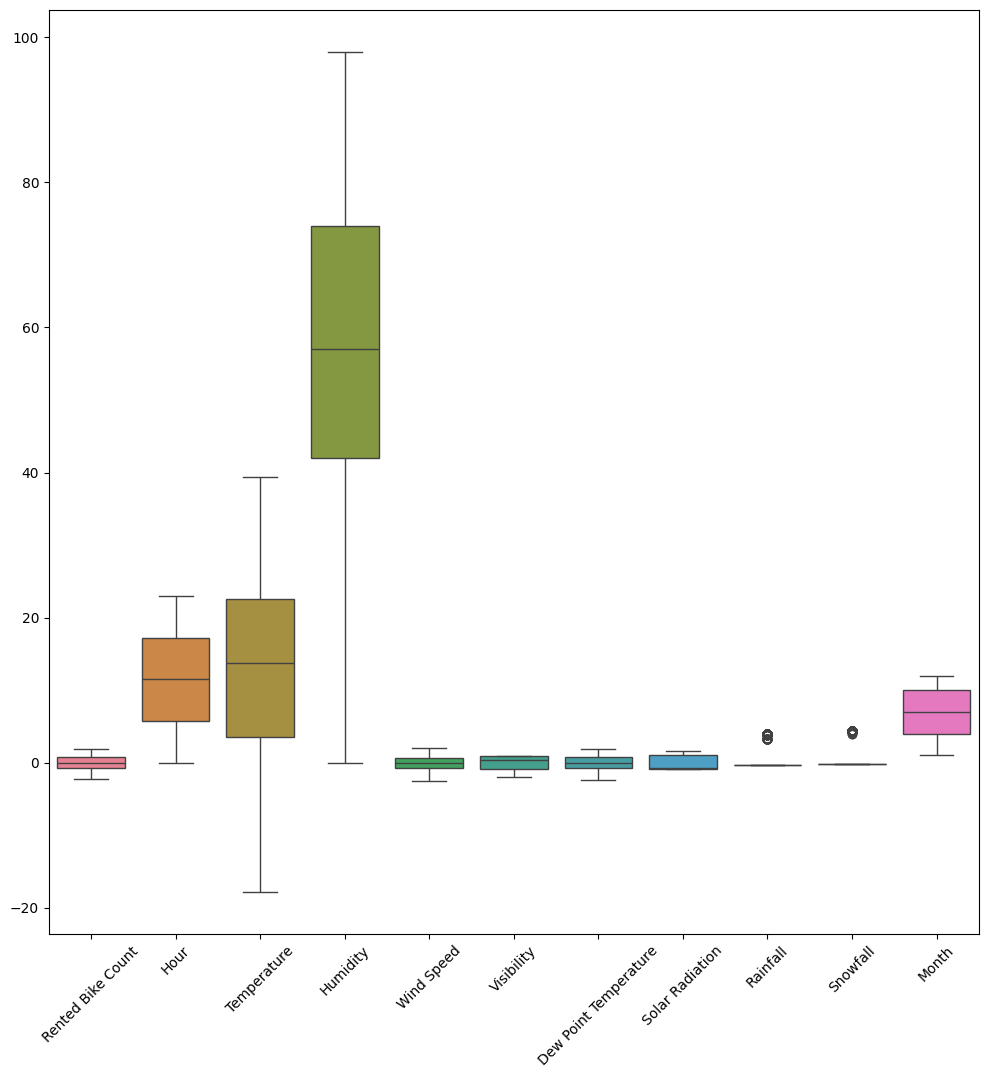

In [31]:
# plot boxplot of numerical columns after outlier handling and transformations
plt.figure(figsize=(12,12))
sns.boxplot(df1)
plt.xticks(rotation=45) 
plt.show()    

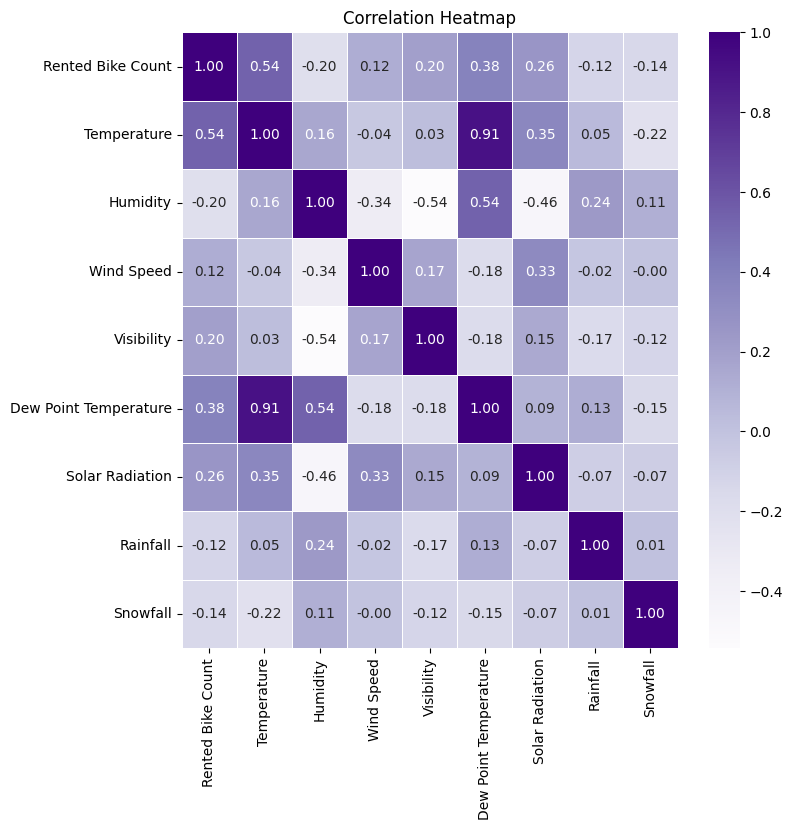

In [32]:
# Getting Correlation between numeric columns

correlation_matrix = numeric_new.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Heatmap')
plt.show()



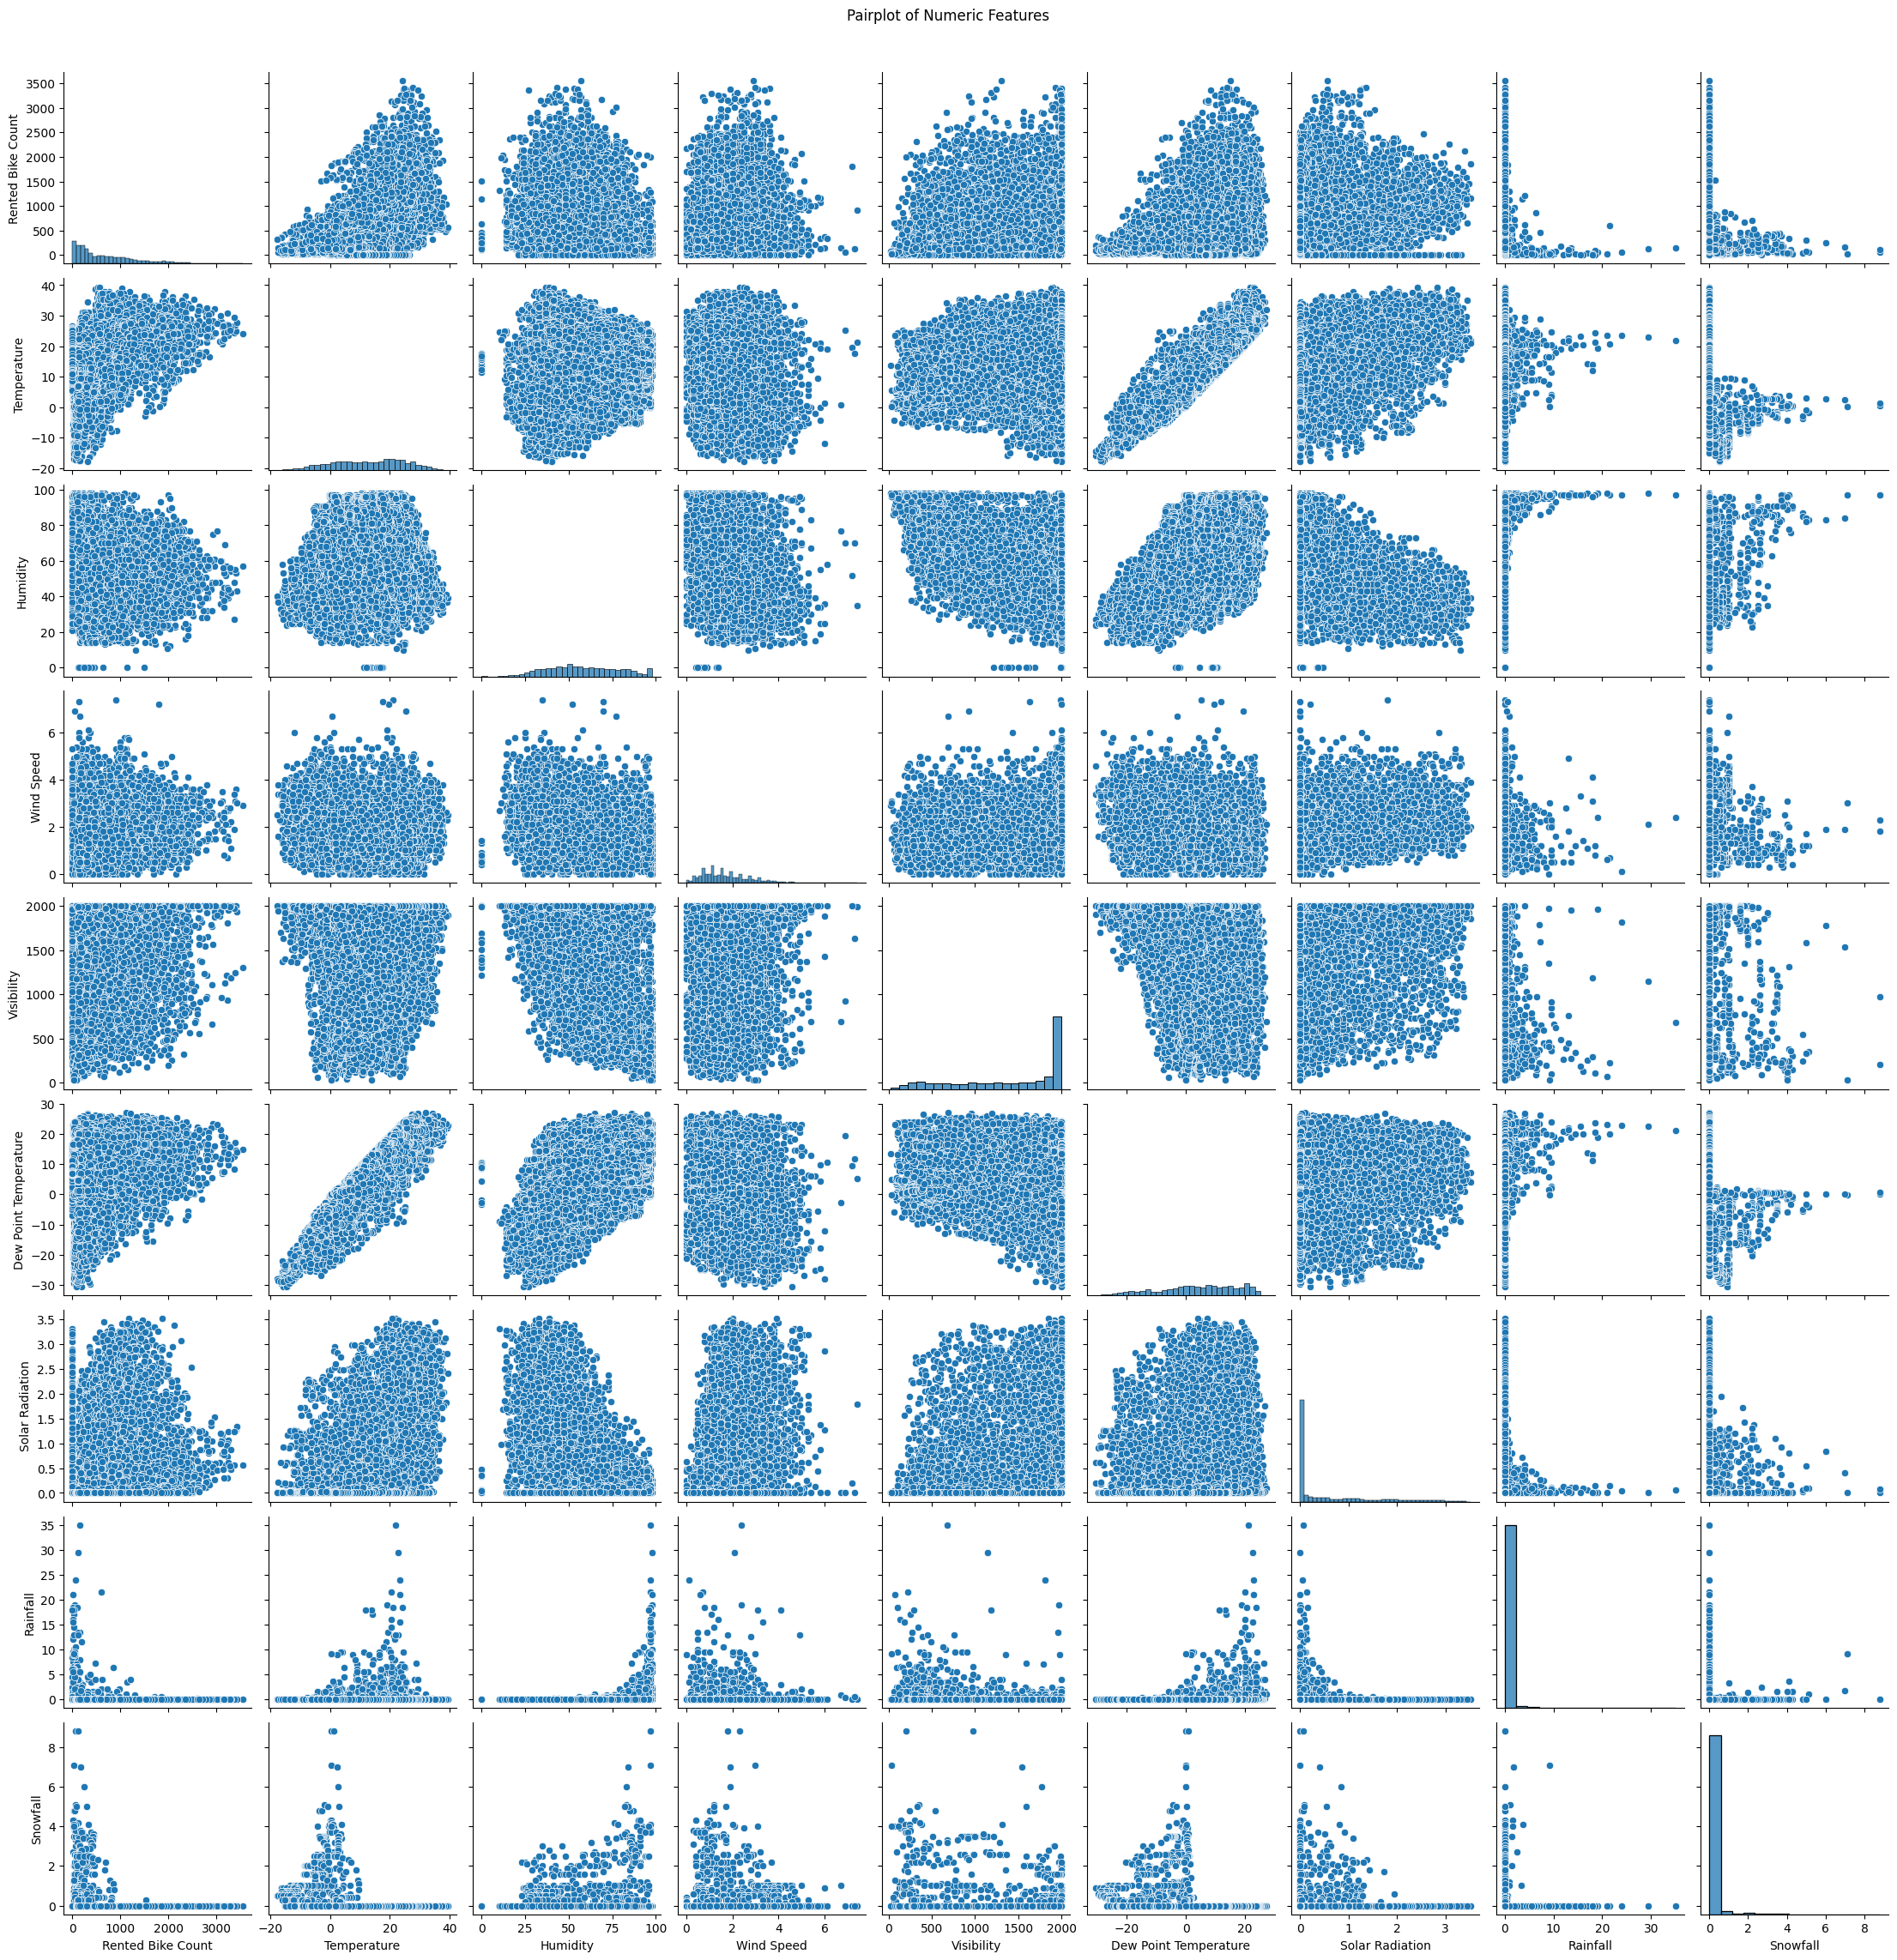

In [33]:
# Create a pairplot to visualize pairwise relationships
sns.pairplot(numeric_new)
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

## Feature Engineering

In this step, we focus on transforming categorical variables into numerical representations suitable for machine learning models. Specifically, we performed the following:

1. **One-Hot Encoding for 'Seasons'**:  
   The 'Seasons' feature, which is categorical, was transformed using one-hot encoding to create separate binary columns for each season. This ensures that the model can interpret the seasons as individual, non-ordinal categories.

2. **One-Hot Encoding for 'Holiday'**:  
   The 'Holiday' feature, which indicates whether a day is a holiday or not, was also one-hot encoded. The first category ('Holiday') was dropped to avoid multicollinearity, ensuring the remaining columns represent the binary 'Holiday' status.

These transformations allow us to include categorical data in our machine learning models in a way that is both interpretable and effective.


In [34]:

#  One-Hot Encoding for 'Seasons' and 'Holiday'
df_encoded = pd.get_dummies(df1, columns=['Seasons'])
df_encoded = pd.get_dummies(df_encoded, columns=['Holiday'], drop_first=True)


In [35]:
# Dataframe informations after encoding
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented Bike Count      8760 non-null   float64
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind Speed             8760 non-null   float64
 5   Visibility             8760 non-null   float64
 6   Dew Point Temperature  8760 non-null   float64
 7   Solar Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Month                  8760 non-null   int32  
 11  Seasons_Autumn         8760 non-null   bool   
 12  Seasons_Spring         8760 non-null   bool   
 13  Seasons_Summer         8760 non-null   bool   
 14  Seasons_Winter         8760 non-null   bool   
 15  Holi

In [36]:
# Calculate the correlation matrix of the encoded dataset
correlation_matrix = df_encoded.corr()
target_correlation = correlation_matrix['Rented Bike Count'].drop('Rented Bike Count')

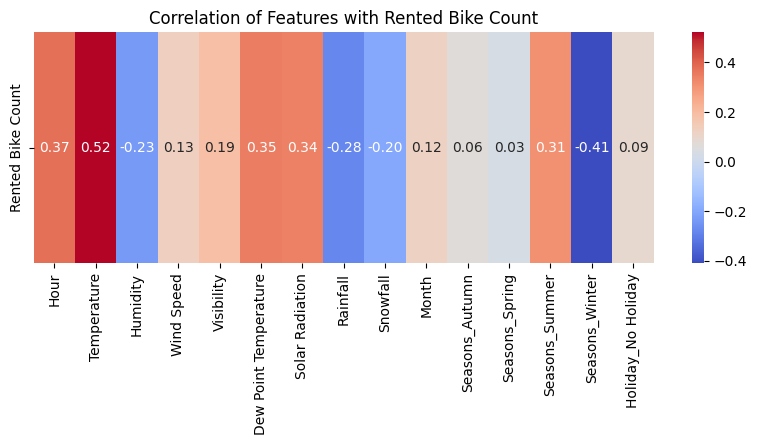

In [37]:
# Plot the correlation of features with the target variable 'Rented Bike Count'
plt.figure(figsize=(10, 3))  # Adjust figure size for readability
sns.heatmap(target_correlation.to_frame().T, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation of Features with Rented Bike Count')
plt.show()

In [38]:
# Separate features (X) and target variable (y)
X=df_encoded.drop('Rented Bike Count',axis=1)
y=df_encoded['Rented Bike Count']

## Train-Test Splitting of Data

In this step, we split the dataset into training and testing sets to evaluate the performance of our machine learning models. The training set will be used to train the models, while the testing set will be used to assess how well the models generalize to unseen data.

We used an 80-20 split, where 80% of the data is used for training, and 20% is held back for testing. This ensures that the model has enough data to learn from while still being evaluated on unseen data to simulate real-world performance.



In [39]:
# Splitting the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Feature Selection Using Random Forest Regressor

In this step, we use a **Random Forest Regressor** to perform feature selection by evaluating the importance of each feature based on how well it improves the prediction of **Rented Bike Count**.

1. **Model Fitting**:  
   We fit a **Random Forest Regressor** model to the training data. The model will automatically compute feature importance based on the contribution of each feature to the overall prediction accuracy.

2. **Feature Importance**:  
   The Random Forest algorithm assigns an importance score to each feature, reflecting its contribution to the model's predictive power. Features with higher importance scores are more influential in predicting the target variable.

3. **Visualization**:  
   A bar plot is generated to display the importance of each feature. Features with the highest scores will be ranked at the top, helping us understand which features play a critical role in predicting bike rentals.
riable.
on.


In [40]:
#Feature Selection Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [41]:
# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to visualize feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

                  Feature  Importance
1             Temperature    0.365952
0                    Hour    0.298251
2                Humidity    0.110188
7                Rainfall    0.093490
13         Seasons_Winter    0.076734
6         Solar Radiation    0.021622
9                   Month    0.012465
10         Seasons_Autumn    0.006145
14     Holiday_No Holiday    0.004302
4              Visibility    0.004051
5   Dew Point Temperature    0.002690
12         Seasons_Summer    0.002170
3              Wind Speed    0.001113
8                Snowfall    0.000419
11         Seasons_Spring    0.000409


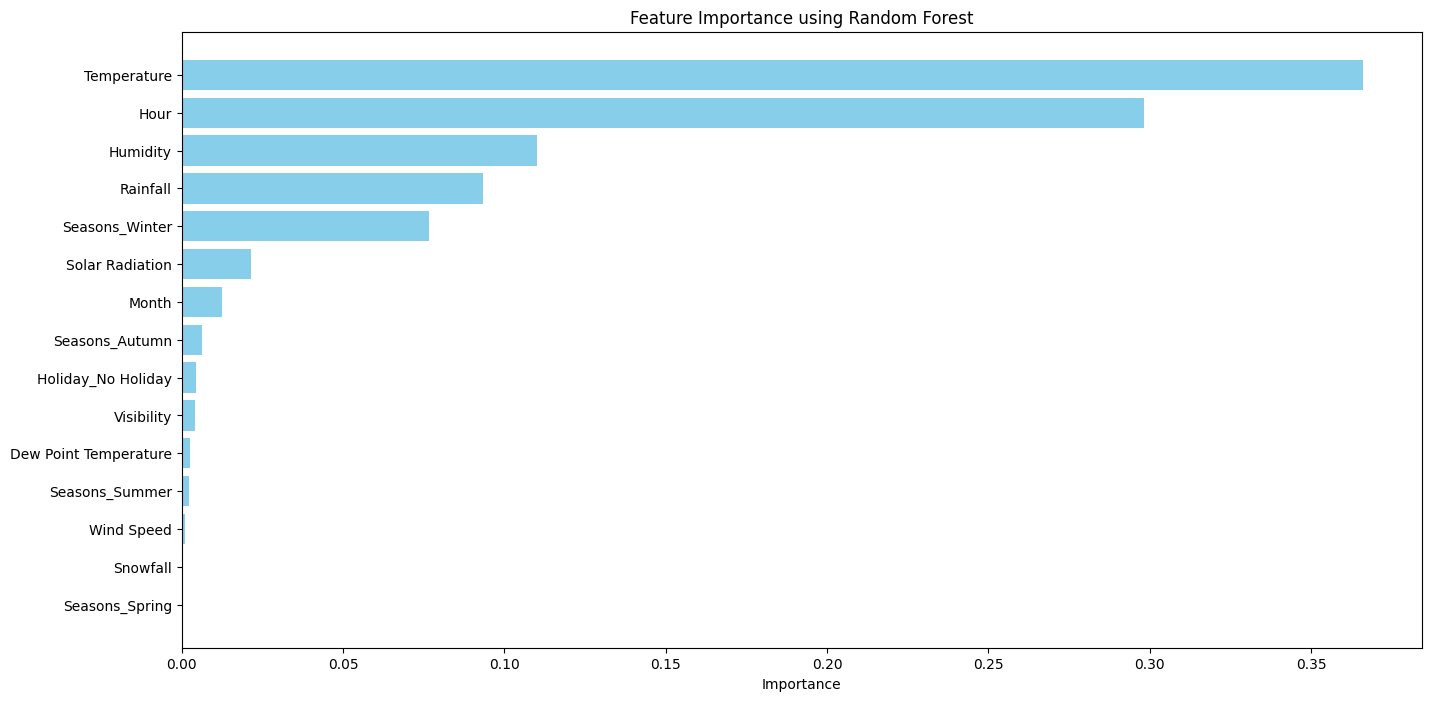

In [42]:
plt.figure(figsize=(16, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance using Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to show most important features on top
plt.show()

In [43]:
# Select the top 13 important features from the feature importance data
top_13_features = feature_importances['Feature'].head(13).values

# Prepare the data with the top 13 features for the training and testing sets
X_train_selected = X_train[top_13_features]
X_test_selected = X_test[top_13_features]


In [44]:
# Display the first five rows of the selected features from the training set
X_train_selected.head()


Temperature  Hour  Humidity  Rainfall  Seasons_Winter  Solar Radiation  \
8415         13.2    15        61 -0.252889           False         1.198186   
5049         22.9     9        86 -0.252889           False         0.985267   
8395         11.2    19        46 -0.252889           False        -0.848321   
1535         -2.6    23        69 -0.252889            True        -0.848321   
5518         27.2    22        73 -0.252889           False        -0.848321   

      Month  Seasons_Autumn  Holiday_No Holiday  Visibility  \
8415     11            True                True   -1.239600   
5049      6           False                True   -1.467367   
8395     11            True                True   -1.031045   
1535      2           False                True   -0.113054   
5518      7           False                True   -0.828146   

      Dew Point Temperature  Seasons_Summer  Wind Speed  
8415               0.058185           False    1.794854  
5049               1.323838            True    0.159427  
8395              -0.405482           False   -0.158897  
1535              -0.915965           False    0.445533  
5518               1.457824            True   -0.048751

In [45]:
# Display the list of the top 13 selected features
top_13_features


array(['Temperature', 'Hour', 'Humidity', 'Rainfall', 'Seasons_Winter',
       'Solar Radiation', 'Month', 'Seasons_Autumn', 'Holiday_No Holiday',
       'Visibility', 'Dew Point Temperature', 'Seasons_Summer',
       'Wind Speed'], dtype=object)

## Feature Scaling

Feature scaling is an important step in the preprocessing pipeline, especially when working with algorithms that are sensitive to the scale of data (e.g., linear regression, support vector machines). The following step applies **StandardScaler** from the `sklearn.preprocessing` module to standardize the features, ensuring they have a mean of 0 and a standard deviation of 1.

Standardization helps improve the convergence speed of optimization algorithms and ensures that all features contribute equally to the model.



In [46]:
# Feature Scaling
print("\nScaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)


Scaling features...


## Model Building and Training

In this step, we will build and train multiple regression models on the training dataset. The models will be trained using the features selected during preprocessing, and their performance will be evaluated based on various metrics. The following models will be trained:

1. **Linear Regression**:  
   This model assumes a linear relationship between the independent features and the target variable, **Rented Bike Count**.

2. **Support Vector Regressor (SVR)**:  
   This model uses a hyperplane to separate the data points in a higher-dimensional space, ideal for capturing non-linear relationships.

3. **Random Forest Regressor**:  
   An ensemble method that builds multiple decision trees and aggregates their results, which helps improve prediction accuracy and reduces overfitting.

4. **Gradient Boosting Regressor**:  
   An ensemble model that builds trees sequentially, focusing on correcting the errors made by previous trees, improving the overall accuracy of predictions.

5. **Decision Tree Regressor**:  
   A model that creates a tree-like structure by splitting the data based on the features to predict the target variable.

Each model will be fitted to the training data and evaluated using performance metrics such as **Mean Squared Error (MSE)**, **Mean Absolute Error (MAE)**, and **R-squared (R2)**.



In [47]:
# Build and evaluate models
print("\nTraining models...")
models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'DecisionTree': DecisionTreeRegressor(random_state=42)
}


Training models...


In [48]:
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # 12. Model Evaluation
    results[name] = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }


Training Linear Regression...

Training SVR...

Training Random Forest...

Training Gradient Boosting...

Training DecisionTree...


## Evaluating Models

Once the regression models are trained, we will evaluate their performance on the test dataset. We will use several evaluation metrics to assess how well each model predicts the target variable, **Rented Bike Count**. The following metrics will be used for evaluation:

1. **Mean Squared Error (MSE)**:  
   This metric calculates the average squared difference between the predicted and actual values. Lower MSE values indicate better model performance.

2. **Mean Absolute Error (MAE)**:  
   This metric computes the average of the absolute differences between predicted and actual values. Like MSE, lower MAE values suggest better accuracy.

3. **R-squared (R2)**:  
   R-squared represents the proportion of the variance in the target variable that is predictable from the independent variables. Higher R2 values indicate better model fit.

We will compare the results from all models to identify the best-performing one for predicting **Rented Bike Count**.


In [49]:
# Print model performance as a DataFrame
print("\nModel Performance:")
performance_df = pd.DataFrame(results).T  # Transpose to have models as rows
# display as a well-formatted table
performance_df.style.format("{:.6f}")


Model Performance:


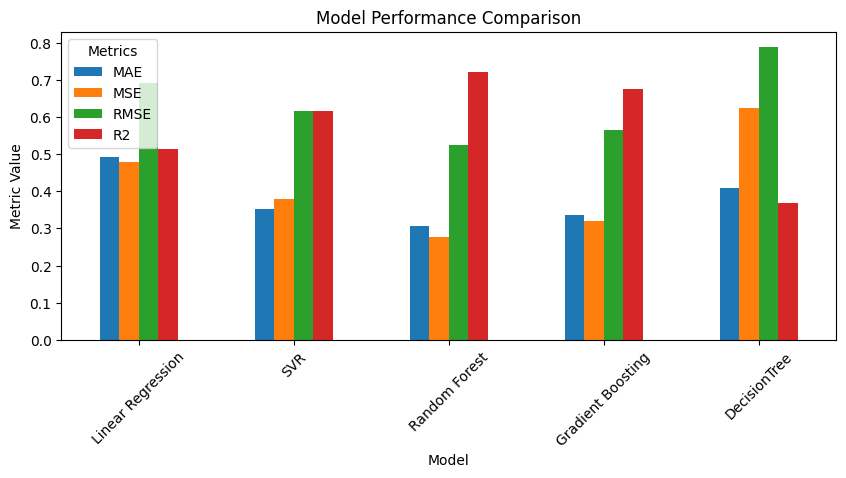

In [50]:
# Plot bar chart for model performance comparison
performance_df.plot(kind='bar', figsize=(10, 4))
plt.title("Model Performance Comparison")
plt.ylabel("Metric Value")
plt.xlabel("Model")
plt.legend(title="Metrics")
plt.xticks(rotation=45)
plt.show()

In [51]:
# Find best model
best_model_name = max(results.items(), key=lambda x: x[1]['R2'])[0]
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")


Best Model: Random Forest


## Hyperparameter Tuning for the Best Model: Random Forest

To enhance the performance of the **Random Forest Regressor**, we will perform hyperparameter tuning using **GridSearchCV**. Hyperparameter tuning allows us to find the optimal combination of parameters that maximize the model’s predictive accuracy and generalization ability.

The following hyperparameters will be tuned:

1. **n_estimators**:  
   The number of trees in the forest. Increasing the number of trees often improves performance, but also increases computation time.

2. **max_features**:  
   The number of features to consider when looking for the best split. Options include:
   - 'sqrt' (square root of the total number of features)
   - 'log2' (logarithm base 2 of the total number of features)
   - `None` (uses all features)

3. **max_depth**:  
   The maximum depth of each tree. A higher value can lead to a more complex model that might overfit, while a lower value may lead to underfitting.

4. **min_samples_split**:  
   The minimum number of samples required to split an internal node. This controls the tree size and helps prevent overfitting.

5. **min_samples_leaf**:  
   The minimum number of samples required to be at a leaf node. A higher value can make the model more general, preventing overfitting.

The **param_grid** is defined with potential values for each hyperparameter, and we will use **GridSearchCV** to exhaustively search through this grid to identify the best-performing set of parameters.

By fine-tuning these hyperparameters, we aim to further improve the Random Forest Regressor’s performance for predicting **Rented Bike Count**.


In [52]:
# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [53]:
# Initialize the Grid Search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

In [54]:
# Fit the Grid Search to the data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.27892559886127655


In [55]:
# Evaluate the best model using best parameters
# Train the best model from Grid Search on the entire training data
best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train_scaled, y_train)

# Predict on the test data
y_test_pred = best_model.predict(X_test_scaled)

# Evaluate the model
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2= r2_score(y_test,y_test_pred)
print(f"Test MSE: {test_mse}")
print(f"Test R2: {test_r2}")

Test MSE: 0.26003763322446777
Test R2: 0.7366274693195072


After tuning Random Forest Regressor has an increase in R2 score

## Creating and Saving Pipeline

In this step, we will create a **Pipeline** that includes feature scaling, model training, and handling missing values with a **Simple Imputer**. The **Simple Imputer** will fill in missing data, ensuring that the dataset is complete and ready for training.

The pipeline will consist of the following steps:

1. **Simple Imputer**:  
   The imputer will handle any missing values in the dataset by filling them with the median of the respective columns. This is a common strategy for numerical features to prevent errors during model training.

2. **Feature Scaling**:  
   **StandardScaler** will be applied to scale the features, ensuring that all variables have a mean of 0 and a standard deviation of 1 before they are input into the model.

3. **Random Forest Regressor**:  
   The **Random Forest Regressor** will be used as the final model in the pipeline, where it will be trained on the scaled features to predict **Rented Bike Count**.

Once the pipeline is created and trained, we will save it using **joblib**, allowing us to reload the trained pipeline for future predictions or evaluation. This ensures that the entire preprocessing and model training process can be easily reused without any manual intervention.



In [56]:
# Create the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),                # Scale the features
    ('model', RandomForestRegressor(max_depth= 30, max_features='sqrt', min_samples_leaf=1, min_samples_split= 2, n_estimators= 200, random_state=42))           # Random Forest Regressor
])
# Train the pipeline
pipeline.fit(X_train_selected, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model',
                 RandomForestRegressor(max_depth=30, max_features='sqrt',
                                       n_estimators=200, random_state=42))])

In [57]:
# saving pipeline model
joblib.dump(pipeline,'Bike_Rental_RF_pipeline.joblib')

['Bike_Rental_RF_pipeline.joblib']

## Testing with Unseen Data

After training the model and performing hyperparameter tuning, the final step is to evaluate the model's performance on **unseen data**. Testing with unseen data is crucial as it simulates real-world scenarios where the model is applied to data it hasn't encountered before.

Here’s the process:

1. **Load the Saved Pipeline**:  
   We will load the trained pipeline that includes the **Simple Imputer**, **StandardScaler**, and **Random Forest Regressor**. This ensures that the preprocessing steps and model are applied consistently.

2. **Prepare the Unseen Data**:  
   The unseen data will be preprocessed in the same way as the training data, ensuring that it is cleaned, scaled, and imputed for missing values.

3. **Predict on Unseen Data**:  
   Using the trained model, we will make predictions on the unseen test data (or new data), and compare the predicted values with the actual values to assess the model’s performance.

4. **Evaluate Performance**:  
   We will evaluate the performance on the unseen data using metrics such as **Mean Absolute Error (MAE)**, **Mean Squared Error (MSE)**, and **R-squared (R2)**. This helps us understand how well the model generalizes to new, unseen data.

Testing with unseen data is essential to ensure the robustness and reliability of the trained model before deploying it for real-world use.


In [58]:
#Loading pipeline
loaded_pipeline=joblib.load('Bike_Rental_RF_pipeline.joblib')

In [59]:
#Creating unseen data from encoded data
unseen_data = df_encoded.head(15)  # Get first 15 rows

print("First 15 rows of encoded data is taken as unseen data")

First 15 rows of encoded data is taken as unseen data


In [60]:
# getting information of unseen data
unseen_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented Bike Count      15 non-null     float64
 1   Hour                   15 non-null     int64  
 2   Temperature            15 non-null     float64
 3   Humidity               15 non-null     int64  
 4   Wind Speed             15 non-null     float64
 5   Visibility             15 non-null     float64
 6   Dew Point Temperature  15 non-null     float64
 7   Solar Radiation        15 non-null     float64
 8   Rainfall               15 non-null     float64
 9   Snowfall               15 non-null     float64
 10  Month                  15 non-null     int32  
 11  Seasons_Autumn         15 non-null     bool   
 12  Seasons_Spring         15 non-null     bool   
 13  Seasons_Summer         15 non-null     bool   
 14  Seasons_Winter         15 non-null     bool   
 15  Holiday_

In [61]:
# Define target and feature variable of unseen data
y_unseen=unseen_data['Rented Bike Count']
X_unseen = unseen_data[top_13_features]  # Filter only the  columns selected by feature selection method


In [62]:
# Use the loaded pipeline to make predictions on the unseen data
predictions = loaded_pipeline.predict(X_unseen)


In [63]:
# adding predicted values as new column
unseen_data = unseen_data.copy()  # Create a copy of the DataFrame
unseen_data.loc[:, 'Rented Bike Count_predicted'] = predictions

In [64]:
# viewing unseen data 
unseen_data

Rented Bike Count  Hour  Temperature  Humidity  Wind Speed  Visibility  \
0           -0.534984     0         -5.2        37    0.621423    0.978214   
1           -0.682015     1         -5.5        38   -0.929718    0.978214   
2           -0.785173     2         -6.0        39   -0.648508    0.978214   
3           -1.053101     3         -6.2        40   -0.785569    0.978214   
4           -1.205568     4         -6.0        36    0.705456    0.978214   
5           -1.087224     5         -6.4        37   -0.048751    0.978214   
6           -0.757489     6         -6.6        35   -0.273528    0.978214   
7           -0.073264     7         -7.4        38   -0.785569    0.978214   
8            0.617816     8         -7.6        37   -0.517858    0.978214   
9           -0.018107     9         -6.5        27   -1.413369    0.831073   
10          -0.322827    10         -3.5        24   -0.393034    0.969979   
11          -0.275820    11         -0.5        21   -0.273528    0.847309   
12          -0.094066    12          1.7        23   -0.158897    0.978214   
13          -0.090259    13          2.4        25    0.057255    0.978214   
14          -0.097883    14          3.0        26    0.445533    0.978214   

    Dew Point Temperature  Solar Radiation  Rainfall  Snowfall  Month  \
0               -1.556854        -0.848321 -0.252889 -0.230785     12   
1               -1.556854        -0.848321 -0.252889 -0.230785     12   
2               -1.563069        -0.848321 -0.252889 -0.230785     12   
3               -1.556854        -0.848321 -0.252889 -0.230785     12   
4               -1.618915        -0.848321 -0.252889 -0.230785     12   
5               -1.625110        -0.848321 -0.252889 -0.230785     12   
6               -1.674606        -0.848321 -0.252889 -0.230785     12   
7               -1.662243        -0.848321 -0.252889 -0.230785     12   
8               -1.693137        -0.794391 -0.252889 -0.230785     12   
9               -1.853088         0.075529 -0.252889 -0.230785     12   
10              -1.779405         0.866560 -0.252889 -0.230785     12   
11              -1.717820         1.137149 -0.252889 -0.230785     12   
12              -1.531975         1.245918 -0.252889 -0.230785     12   
13              -1.432117         1.273055 -0.252889 -0.230785     12   
14              -1.369415         1.185339 -0.252889 -0.230785     12   

    Seasons_Autumn  Seasons_Spring  Seasons_Summer  Seasons_Winter  \
0            False           False           False            True   
1            False           False           False            True   
2            False           False           False            True   
3            False           False           False            True   
4            False           False           False            True   
5            False           False           False            True   
6            False           False           False            True   
7            False           False           False            True   
8            False           False           False            True   
9            False           False           False            True   
10           False           False           False            True   
11           False           False           False            True   
12           False           False           False            True   
13           False           False           False            True   
14           False           False           False            True   

    Holiday_No Holiday  Rented Bike Count_predicted  
0                 True                    -0.870986  
1                 True                    -0.735630  
2                 True                    -0.838219  
3                 True                    -1.071010  
4                 True                    -1.220563  
5                 True                    -1.105112  
6                 True                    -0.892898  
7                 True           

In [65]:
# saving the unseen data as csv file
unseen_data.to_csv('Bike_Rental_unseen_data.csv',index=False)

In [66]:
# Display the selected columns
print(unseen_data[['Rented Bike Count', 'Rented Bike Count_predicted']])


    Rented Bike Count  Rented Bike Count_predicted
0           -0.534984                    -0.870986
1           -0.682015                    -0.735630
2           -0.785173                    -0.838219
3           -1.053101                    -1.071010
4           -1.205568                    -1.220563
5           -1.087224                    -1.105112
6           -0.757489                    -0.892898
7           -0.073264                    -0.219425
8            0.617816                    -0.024850
9           -0.018107                    -0.187357
10          -0.322827                    -0.379264
11          -0.275820                    -0.360291
12          -0.094066                    -0.159725
13          -0.090259                    -0.152082
14          -0.097883                    -0.236644


In [67]:
# Calculate R2 Score
unseen_r2 = r2_score(unseen_data['Rented Bike Count'], unseen_data['Rented Bike Count_predicted'])

# Calculate Mean Absolute Error (MAE)
unseen_mae = mean_absolute_error(unseen_data['Rented Bike Count'], unseen_data['Rented Bike Count_predicted'])

# Calculate Mean Squared Error (MSE)
unseen_mse = mean_squared_error(unseen_data['Rented Bike Count'], unseen_data['Rented Bike Count_predicted'])

# Calculate Root Mean Squared Error (RMSE)
unseen_rmse = np.sqrt(unseen_mse)

# Print results neatly
print("Error Metrics for Predicted Values on Unseen Data:")
print(f"  R2 Score: {unseen_r2:.4f}")
print(f"  Mean Absolute Error (MAE): {unseen_mae:.4f}")
print(f"  Mean Squared Error (MSE): {unseen_mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {unseen_rmse:.4f}")

Error Metrics for Predicted Values on Unseen Data:
  R2 Score: 0.8175
  Mean Absolute Error (MAE): 0.1329
  Mean Squared Error (MSE): 0.0426
  Root Mean Squared Error (RMSE): 0.2063


The evaluation of the unseen data yielded a better accuracy score with fewer errors. However, it is clear that since the regression was performed on "Rented Bike Count," the predicted values should be integers. The negative and fractional values observed are a result of applying the Power Transformation to address skewness in the data. To provide a more meaningful presentation, we will now apply the inverse of the Power Transformation to both the predicted and actual values, ensuring the results are more representative for visualization.


In [68]:

# Initialize PowerTransformer with 'yeo-johnson' method
pt = PowerTransformer(method='yeo-johnson')

# Reshape the Series into a 2D array and apply fit_transform
y_test_original_transformed = pt.fit_transform(df['Rented Bike Count'].head(15).values.reshape(-1, 1))


In [69]:
# Inverse transform the original Rented Bike Count values from the unseen data
Rented_bike_count_original = pt.inverse_transform(unseen_data['Rented Bike Count'].values.reshape(-1, 1))

# Inverse transform the predicted Rented Bike Count values from the unseen data
Rented_bike_count_predicted = pt.inverse_transform(unseen_data['Rented Bike Count_predicted'].values.reshape(-1, 1))

In [70]:
# Create a DataFrame to display the data in a table
unseen_comparison = pd.DataFrame({
    'Original Rented Bike Count': Rented_bike_count_original.flatten(),  # Flatten the arrays
    'Predicted Rented Bike Count': Rented_bike_count_predicted.flatten()  # Flatten the arrays
})

# Convert the values to whole integers
unseen_comparison = unseen_comparison.round(0).astype(int)

# Display the table
print(unseen_comparison)


    Original Rented Bike Count  Predicted Rented Bike Count
0                          196                          153
1                          176                          169
2                          163                          157
3                          133                          131
4                          118                          117
5                          130                          128
6                          167                          151
7                          270                          244
8                          421                          279
9                          280                          250
10                         228                          219
11                         235                          222
12                         266                          255
13                         267                          256
14                         265                          242


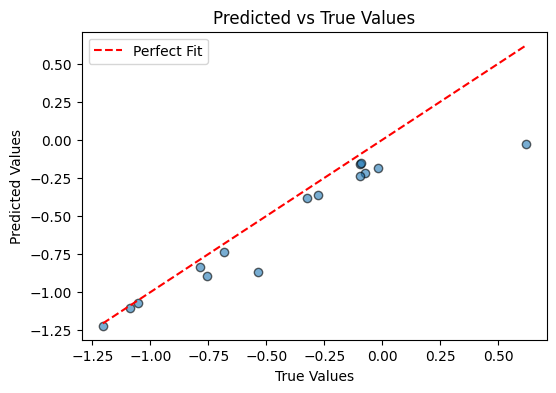

In [71]:
# visualising the  relationship between the true values and the predicted values 
y_true=unseen_data['Rented Bike Count']
y_pred_unseen=unseen_data['Rented Bike Count_predicted']
plt.figure(figsize=(6, 4))
plt.scatter(y_true, y_pred_unseen, alpha=0.6, edgecolors='k')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', label="Perfect Fit")
plt.title("Predicted vs True Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()


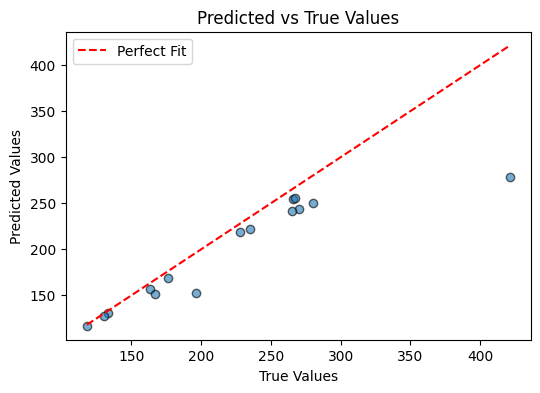

In [73]:
# Assuming 'df_comparison' is your DataFrame with the columns 'Original Rented Bike Count' and 'Predicted Rented Bike Count'

y_true_comparison = unseen_comparison['Original Rented Bike Count']
y_pred_comparison = unseen_comparison['Predicted Rented Bike Count']

# Create the scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(y_true_comparison, y_pred_comparison, alpha=0.6, edgecolors='k')
plt.plot([y_true_comparison.min(), y_true_comparison.max()], 
         [y_true_comparison.min(), y_true_comparison.max()], 'r--', label="Perfect Fit")
plt.title("Predicted vs True Values in Real scale")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

The plot help to undersatand  how closely the predicted values  align with the true values.

## Conclusions

The model performance analysis revealed that the **Random Forest Regressor** was the best-performing model, achieving an **R2 score of 0.72993**, indicating a strong fit to the data and the ability to explain around 73% of the variance in the target variable. The model also demonstrated excellent generalization to unseen data, with an **R2 score of 0.82612**, which suggests that it can be effectively used for predicting bike rental demand in real-world scenarios. The **SVR** and **Gradient Boosting Regressor** showed good performance as well, but **Decision Tree Regressor** underperformed due to potential overfitting.

Feature selection highlighted key factors influencing bike rental demand, such as **Temperature**, **Humidity**, **Rainfall**, **Season**, and **Wind Speed**, which were critical in the Random Forest model’s predictions. Despite its strong performance, the dataset and model have certain limitations that could be addressed in future work.

#### Limitations of the Dataset

1. **Lack of External Data**:  
   The dataset primarily includes weather-related and seasonal features, but external factors such as **local events**, **traffic conditions**, and **user demographics** can significantly impact bike rental demand. Incorporating such data could further improve the model’s predictive accuracy.

2. **Geographical Factors**:  
   The dataset does not account for **geographical variation**s or location-based demand, meaning it does not capture spatial trends such as popular rental locations or city-specific patterns. This lack of spatial data could limit the model's ability to accurately predict demand in specific areas of the city or region.


3. **Feature Limitations**:  
   Certain key features, such as **bike availability** or **user behavior patterns**, are missing from the dataset. Including these features could improve the model's ability to predict demand more accurately, especially during peak periods or periods of low availability.

In conclusion, while the **Random Forest Regressor** provided solid results, the model could benefit from the inclusion of additional features and external data sources. Addressing these limitations will likely improve the model's robustness and its ability to handle real-world scenarios more effectively.


## Future Work

1. **Explore Deep Learning Algorithms**:  
   While traditional machine learning models like **Random Forest** have shown strong performance, exploring **deep learning algorithms** (e.g., **Neural Networks** or **LSTMs**) could lead to even higher accuracy, especially when capturing complex, non-linear relationships in the data. These models can learn from large datasets and may improve performance in scenarios with more features or data points.

2. **Periodic Model Updates**:  
   The bike rental demand might evolve over time due to seasonal changes, urban development, or shifts in user behavior. To maintain accuracy, the model should be **updated periodically with new data**. This would allow it to adapt to new trends and improve long-term performance by staying current with recent rental patterns.

3. **Enhance Feature Set**:  
   Additional features, such as **user demographics**, **bike availability**, or even **city-specific data**, could improve the predictive power of the model. Incorporating **spatial data** to capture geographical trends, or **external variables** like traffic or events, might further enhance prediction accuracy and make the model more robust in real-world applications.
